In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10) #inna wartość patience!!

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()
EPOCHS = 100

In [2]:
# Stwórz prostą sieć neuronową. Ile neuronów powinno być w ostatniej warstwie? Jaka funkcja
# aktywacji? Do wspólnego zastanowienia.
# Jaką funkcję straty wykorzystać podczas kompilacji? Jakie metryki śledzić?
# Wytrenuj model.
# Wyświetl wykresy funkcji straty dla zbioru treningowego i walidacyjnego.

1 neuron wyjściowy - zwracający przewidywaną wartość, zatem jako funkcję aktywacji trzeba wrzucić liniową 
nie ma klasyfikacji - więc jaką funkcję straty sobie przyjąć? liczymy sobie MAE i MSE

In [15]:
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer='adam', loss= 'mse', metrics=['mae'])

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 2852.7388 - mae: 40.0894 - val_loss: 1040.7178 - val_mae: 27.4386
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 471.3078 - mae: 16.9345 - val_loss: 176.5456 - val_mae: 11.0299
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 159.8380 - mae: 10.3414 - val_loss: 116.3385 - val_mae: 7.9826
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 100.5108 - mae: 6.8026 - val_loss: 83.7927 - val_mae: 6.7331
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 82.9221 - mae: 6.7247 - val_loss: 84.4808 - val_mae: 6.8190
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 77.3929 - mae: 6.0311 - val_loss: 78.3080 - val_mae: 6.5229
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 73.0497 - mae: 6.0961 - val_loss: 75.4786 - val_mae: 6.4118
Epoch 8/100
13/13 [==============================] - 0

13/13 [==============================] - 0s 3ms/step - loss: 35.8722 - mae: 4.2622 - val_loss: 44.4917 - val_mae: 4.5951
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 34.9388 - mae: 4.0863 - val_loss: 42.6005 - val_mae: 4.6439
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 34.3425 - mae: 4.0756 - val_loss: 40.7747 - val_mae: 4.3643
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 33.5905 - mae: 3.9074 - val_loss: 42.4316 - val_mae: 4.6429
Epoch 66/100
13/13 [==============================] - 0s 3ms/step - loss: 33.4226 - mae: 3.9299 - val_loss: 41.9010 - val_mae: 4.6543
Epoch 67/100
13/13 [==============================] - 0s 3ms/step - loss: 34.4591 - mae: 4.0664 - val_loss: 40.9291 - val_mae: 4.5616
Epoch 68/100
13/13 [==============================] - 0s 3ms/step - loss: 34.6123 - mae: 4.0908 - val_loss: 45.7974 - val_mae: 5.1316
Epoch 69/100
13/13 [==============================] - 0s 3ms/step - loss: 3

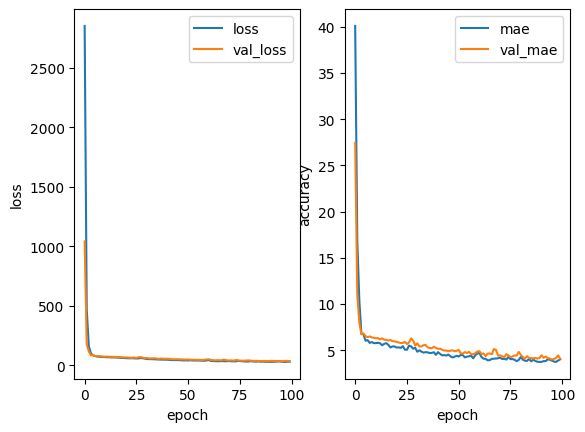

In [18]:
hist = pd.DataFrame(history.history)
hist

plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.mae, label = "mae")
plt.plot(hist.val_mae, label = "val_mae")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

wykresy powinny być maksymalnie wypłaszczone - wtedy sieć się ślicznie nauczyła
regresja w sumie jest prosta, wymaga tylko podmiany kilku rzeczy